In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #  for avoid unwanted warnings
warnings.filterwarnings('ignore')
from IPython.core.display import HTML,display

In [2]:
pd.set_option('display.max_columns',None) # to show maximum number of columns

In [3]:
data=pd.read_csv('Suicides in India 2001-2012.csv')

In [4]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [5]:
print('Total No Of ROWs =',data.shape[0])
print('Total No Of COLUMNs =',data.shape[1])

Total No Of ROWs = 237519
Total No Of COLUMNs = 7


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [7]:
data.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


In [8]:
data.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [9]:
data.nunique()

State          38
Year           12
Type_code       5
Type           69
Gender          2
Age_group       6
Total        2180
dtype: int64

<AxesSubplot:xlabel='Age_group', ylabel='count'>

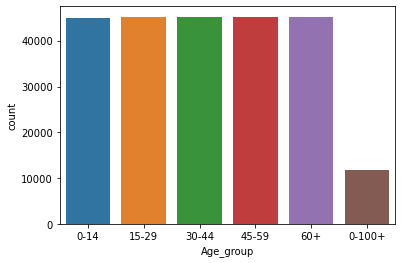

In [10]:
sns.countplot(data['Age_group']) 

In [11]:
data['Age_group'].value_counts()

15-29     45223
30-44     45193
45-59     45146
60+       45074
0-14      45027
0-100+    11856
Name: Age_group, dtype: int64

In [12]:
data['Type_code'].value_counts() 

Causes                  109200
Means_adopted            67200
Professional_Profile     49263
Education_Status          7296
Social_Status             4560
Name: Type_code, dtype: int64

In [13]:
allcol=data.nunique().sort_values().keys()[:-1]
sapret_column=[]
for i in range(len(allcol)):
    a=data[allcol[i]].value_counts()
    if len(a) >= 39:
        break;
    sapret_column.append(allcol[i])
    display(HTML(f'---------------- <b>  {allcol[i]}  </b> ----------------'))
    print(a)

Male      118879
Female    118640
Name: Gender, dtype: int64


Causes                  109200
Means_adopted            67200
Professional_Profile     49263
Education_Status          7296
Social_Status             4560
Name: Type_code, dtype: int64


15-29     45223
30-44     45193
45-59     45146
60+       45074
0-14      45027
0-100+    11856
Name: Age_group, dtype: int64


2011    19806
2005    19803
2012    19799
2001    19797
2008    19797
2007    19794
2010    19792
2002    19790
2003    19786
2006    19786
2009    19786
2004    19783
Name: Year, dtype: int64


Karnataka            6792
Madhya Pradesh       6792
Maharashtra          6792
Rajasthan            6791
Andhra Pradesh       6791
Odisha               6791
Haryana              6790
Chhattisgarh         6790
Bihar                6790
Kerala               6788
Uttar Pradesh        6787
Assam                6786
Gujarat              6786
Tamil Nadu           6786
Jharkhand            6785
Delhi (Ut)           6782
Tripura              6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (All India)     312
Total (States)        312
Total (Uts)           312
Name: State,

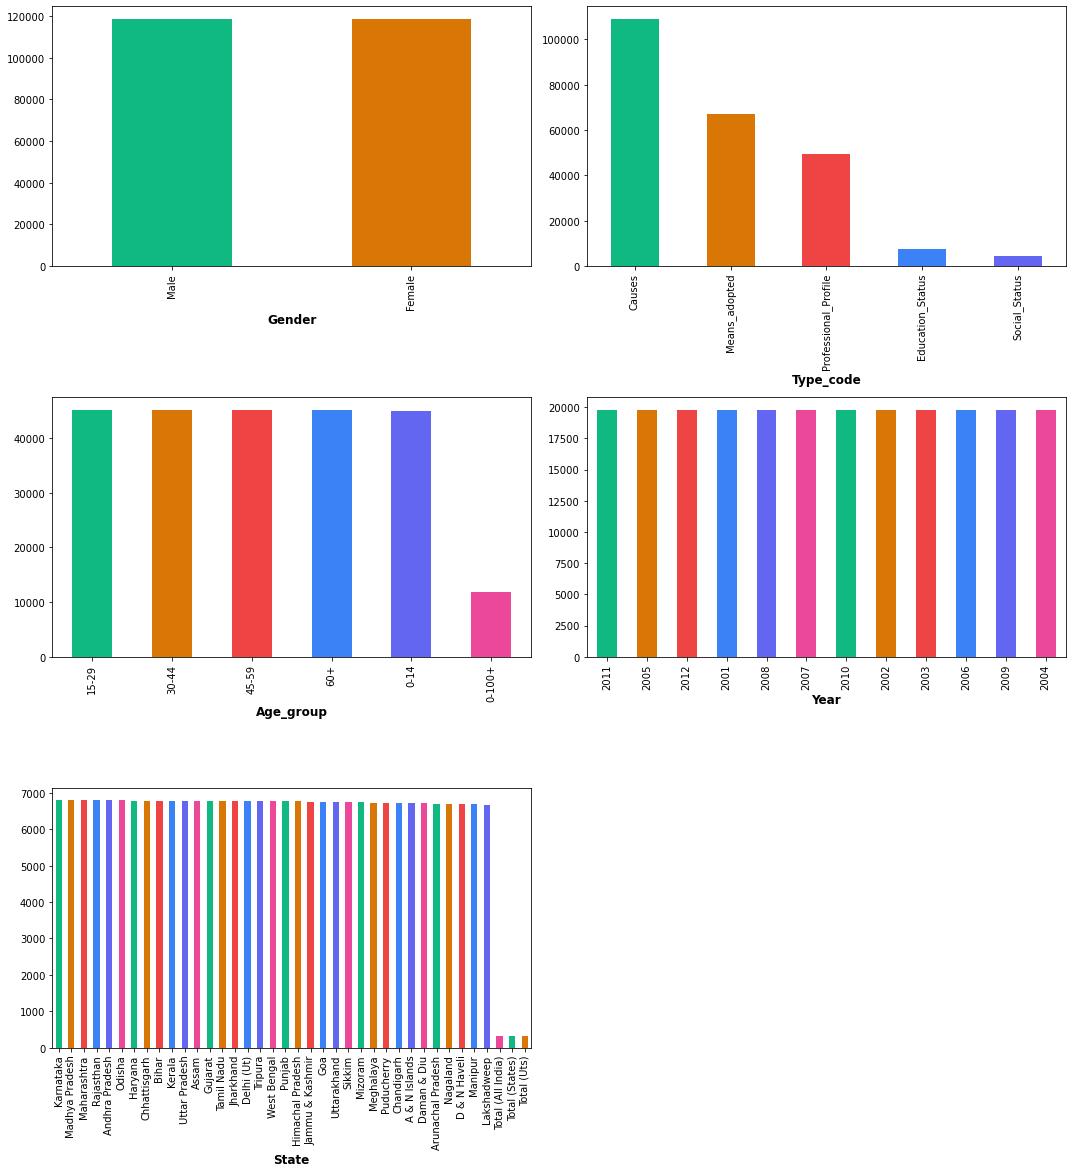

In [14]:
plt.figure(figsize=(15,15))
for i in range(len(sapret_column)):
    if i == 40:
        break;
    plt.subplot(3,2,i+1)
    plt.tight_layout() # for maintain spaceing between multple graphs
    plt.xlabel(sapret_column[i],fontsize=12.0,fontweight='bold') 
    data[sapret_column[i]].value_counts().plot(kind="bar", color = ['#10B981','#D97706','#EF4444','#3B82F6','#6366F1','#EC4899'])  
#   sns.countplot(data=dataset,x=col_key[i])

In [15]:
data=data.drop(data[data['Total'] == 0].index)
# drop all data['total'] == 0

In [16]:
data = data.drop(data[(data.State == 'Total (Uts)') | (data.State == 'Total (All India)') | 
               (data.State == 'Total (States)')].index) 

In [18]:
data[data['Gender'] == 'Male'].shape[0]

54841

In [19]:
data[data['Gender'] == 'Female'].shape[0]

46269

In [20]:
data['Gender'].shape[0]

101110

In [39]:
data.groupby('Gender').sum()['Total']

Gender
Female    2606922
Male      4641088
Name: Total, dtype: int64

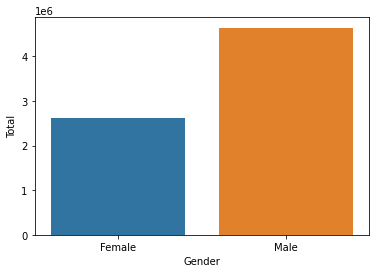

In [104]:
sns.barplot(data.groupby('Gender').sum()['Total'].index,data.groupby('Gender').sum()['Total'])
display(HTML('<h3>Who suicide more Male or Female ?</h4>'))
plt.show()

In [102]:
agegroup = data[data['Age_group'] != '0-100+'] # we confused about 0-100+ means 

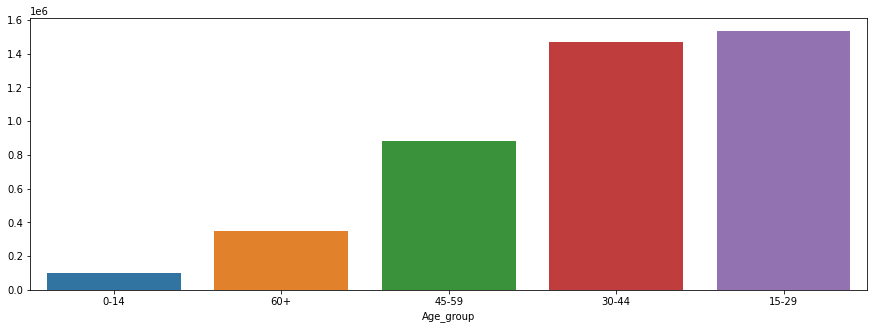

In [130]:
plt.figure(figsize=(15,5))
sns.barplot(agegroup.groupby('Age_group').sum()['Total'].sort_values().index ,agegroup.groupby('Age_group').sum()['Total'].sort_values().values)
display(HTML('<h3>Which Age-group Suicide more ?</h4>'))
plt.show()

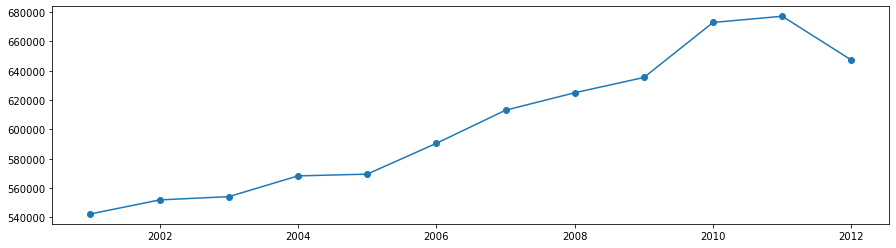

In [128]:
plt.figure(figsize=(15,4))
plt.plot(data.groupby('Year').sum()['Total'].index , data.groupby('Year').sum()['Total'],marker='o')
display(HTML('<h3>Which Year has more Suicide  ?</h4>'))
plt.show()

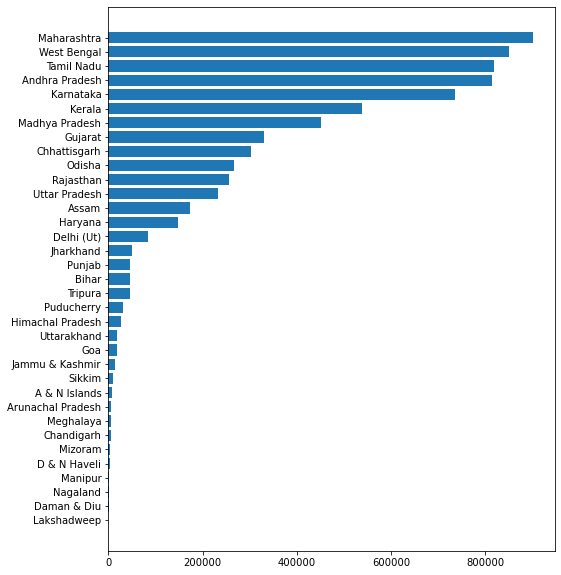

In [144]:
plt.figure(figsize=(8,10))
plt.barh(data.groupby('State').sum()['Total'].sort_values().index , data.groupby('State').sum()['Total'].sort_values().values)
display(HTML('<h3>Which State has more Suicide  ?</h4>'))
plt.show()

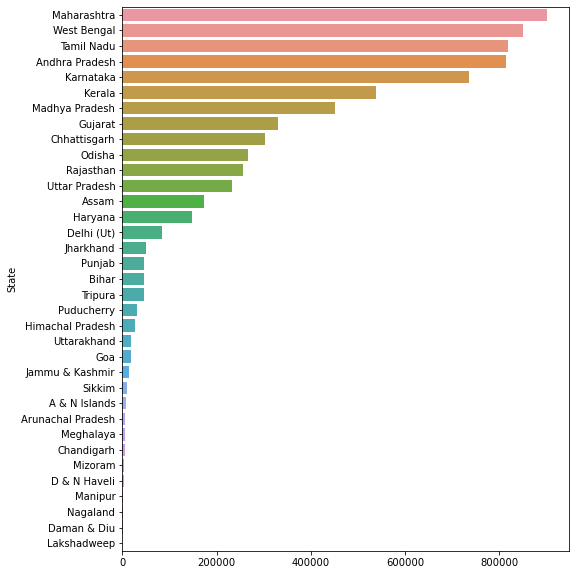

In [160]:
state_suicide = data.groupby('State').sum()['Total'].sort_values(ascending = False)

plt.figure(figsize=(8,10))
sns.barplot(y=state_suicide.index , x=state_suicide.values)
display(HTML('<h3>Which State has more Suicide  ?</h4>'))
plt.show()

In [218]:
data['Type_code'].value_counts()

Causes                  39531
Means_adopted           29337
Professional_Profile    23291
Education_Status         5602
Social_Status            3349
Name: Type_code, dtype: int64

In [207]:
Causes = data[data['Type_code'] == 'Causes']
Means_adopted = data[data['Type_code'] == 'Means_adopted']
Professional_Profile = data[data['Type_code'] == 'Professional_Profile']
Education_Status = data[data['Type_code'] == 'Education_Status']
Social_Status = data[data['Type_code'] == 'Social_Status']

In [246]:
def sucide_type_plot(typecode):
    title = typecode['Type_code'].values[0]
    suicide = typecode.groupby('Type').sum()['Total'].sort_values(ascending=False)

    plt.figure(figsize=(15,10))
    sns.barplot(y=suicide.index , x=suicide.values)
    display(HTML(f'<h3>Suicide By {title}</h3>'))
    plt.show()

In [254]:
# col =[Causes,Means_adopted,Professional_Profile,Education_Status,Social_Status]
# for i in col:
#     sucide_type_plot(i)

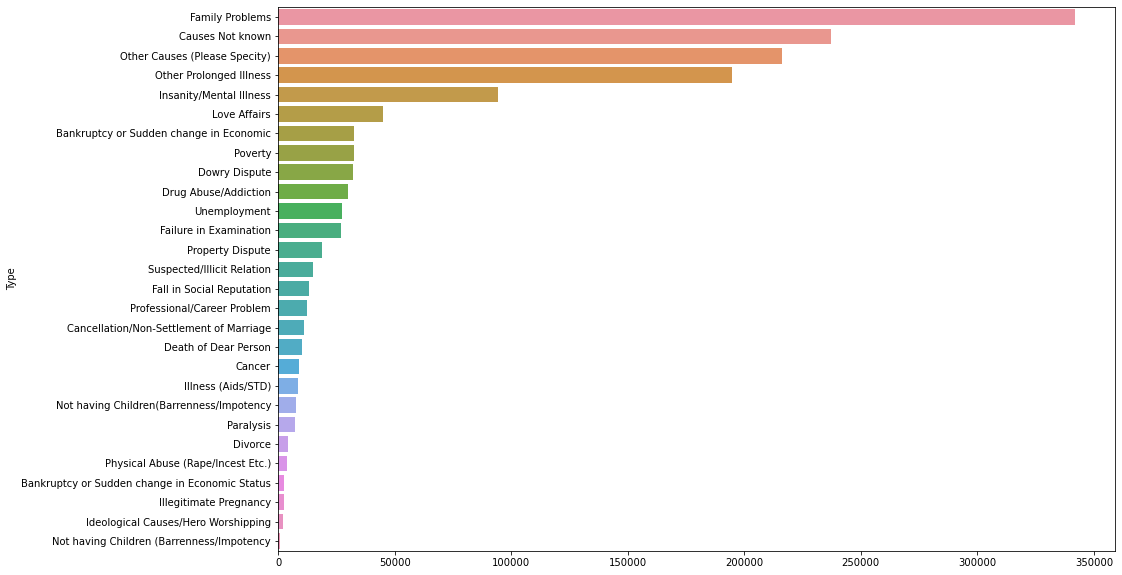

In [255]:
sucide_type_plot(Causes)

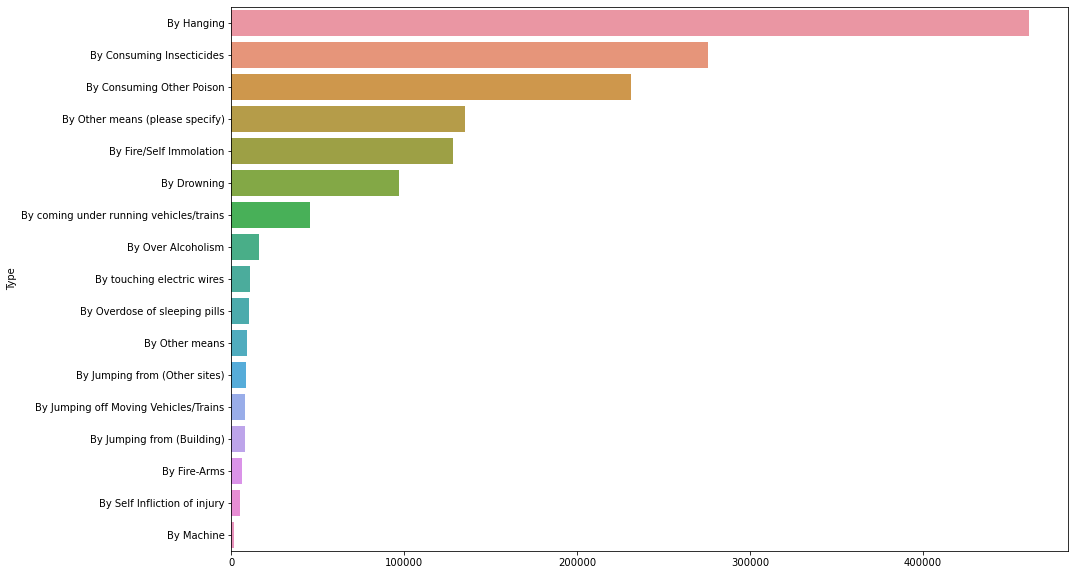

In [256]:
sucide_type_plot(Means_adopted)

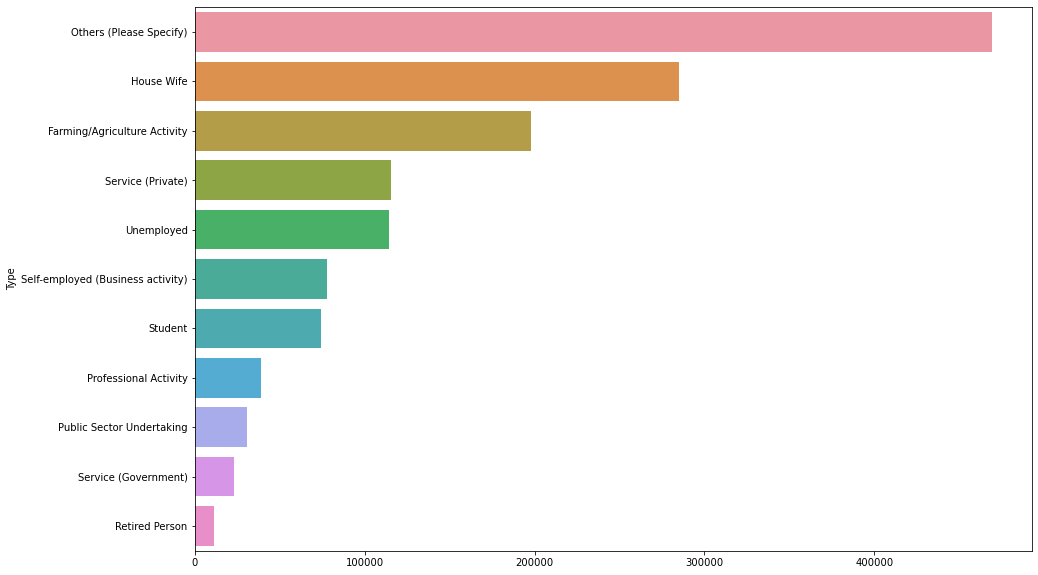

In [257]:
sucide_type_plot(Professional_Profile)

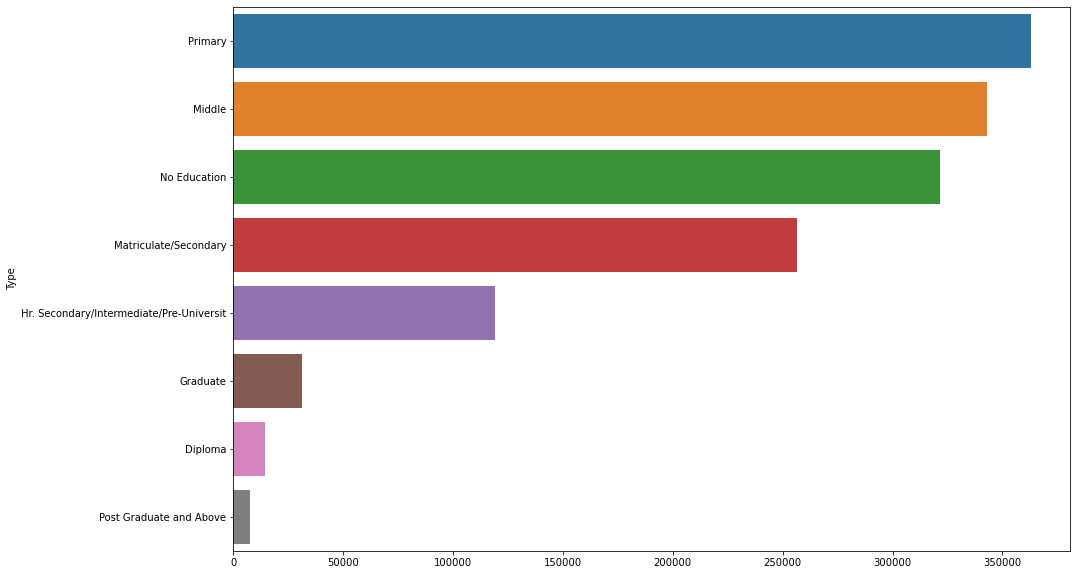

In [258]:
sucide_type_plot(Education_Status)

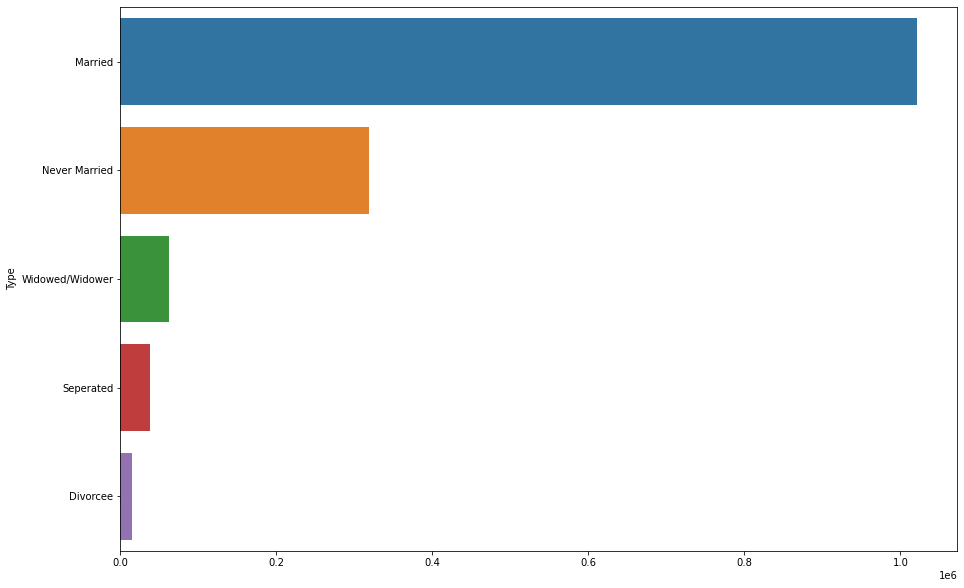

In [259]:
sucide_type_plot(Social_Status)

In [269]:
data.groupby('Age_group').sum()

,Year,Total
Age_group,,
0-100+,17960572,2911862
0-14,19340559,98410
15-29,50083222,1534037
30-44,48285145,1471599
45-59,39589590,885177
60+,27622857,346925


In [392]:
age_0_14 = data[data['Age_group'] == '0-14']
age_15_29 = data[data['Age_group'] == '15-29']
age_30_44 = data[data['Age_group'] == '30-44']
age_45_59 = data[data['Age_group'] == '45-59']
age_60_more = data[data['Age_group'] == '60+']
age_0_100_more = data[data['Age_group'] == '0-100+']

In [311]:
sucideresson = data['Type_code'].value_counts().index
sucideresson

Index(['Causes', 'Means_adopted', 'Professional_Profile', 'Education_Status',
       'Social_Status'],
      dtype='object')

In [400]:
col = [age_0_14,age_15_29,age_30_44,age_45_59,age_60_more,age_0_100_more]

In [401]:
ageres=[] 
for i in col:
    for j in sucideresson:
        a = i[i['Type_code'] == j]
        if len(a) != 0:
            ageres.append(a) 

In [402]:
def sucide_age_wise_plot(typecode,title):
    suicide = typecode.groupby('Type').sum()['Total'].sort_values(ascending=False)

    plt.figure(figsize=(15,10))
    sns.barplot(y=suicide.index , x=suicide.values)
    display(HTML(f'<h3>{title}</h3>'))
    plt.show()

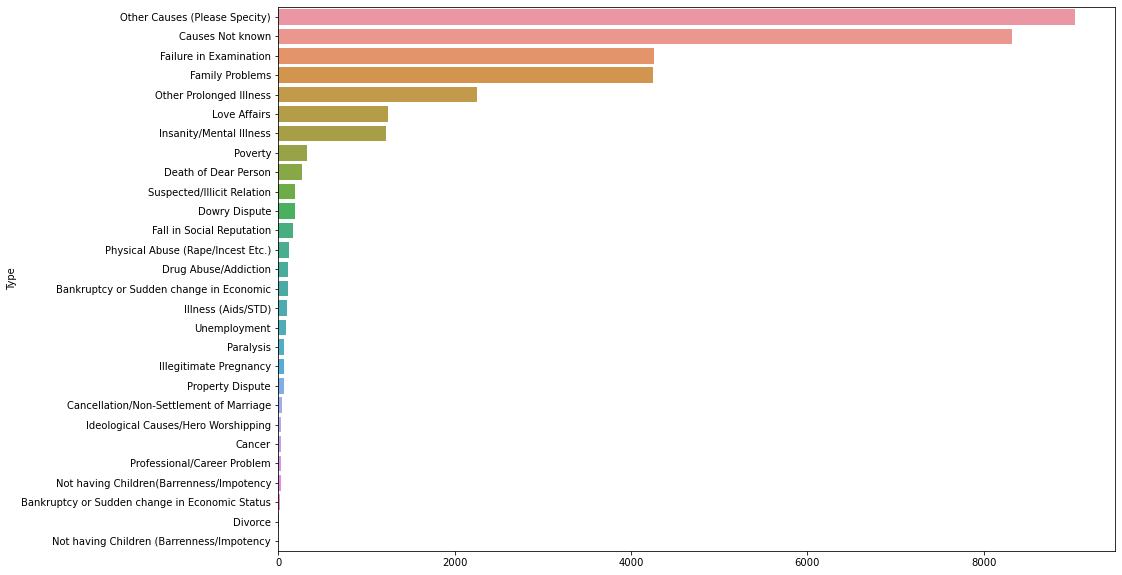

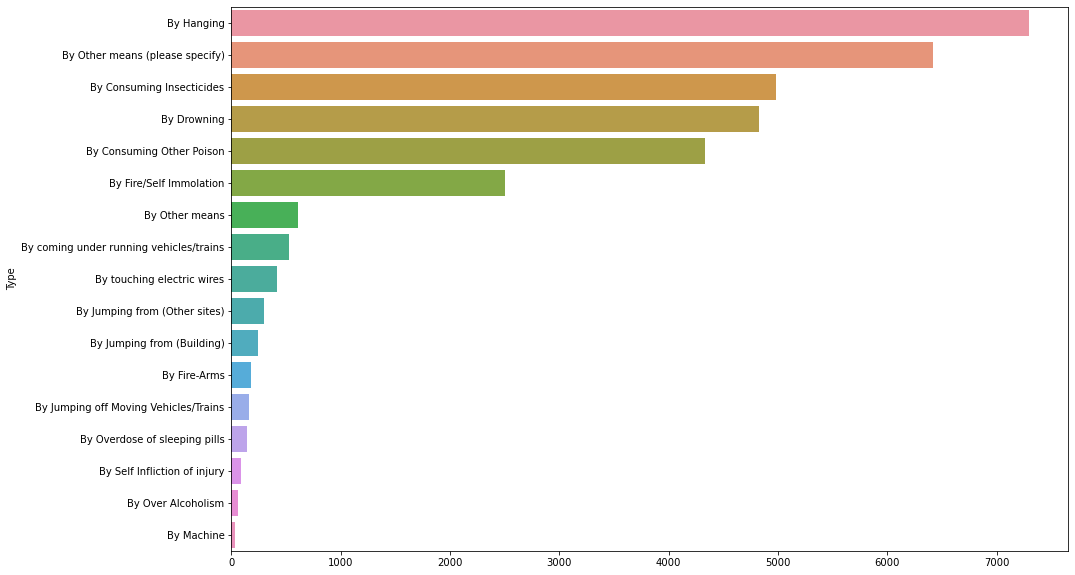

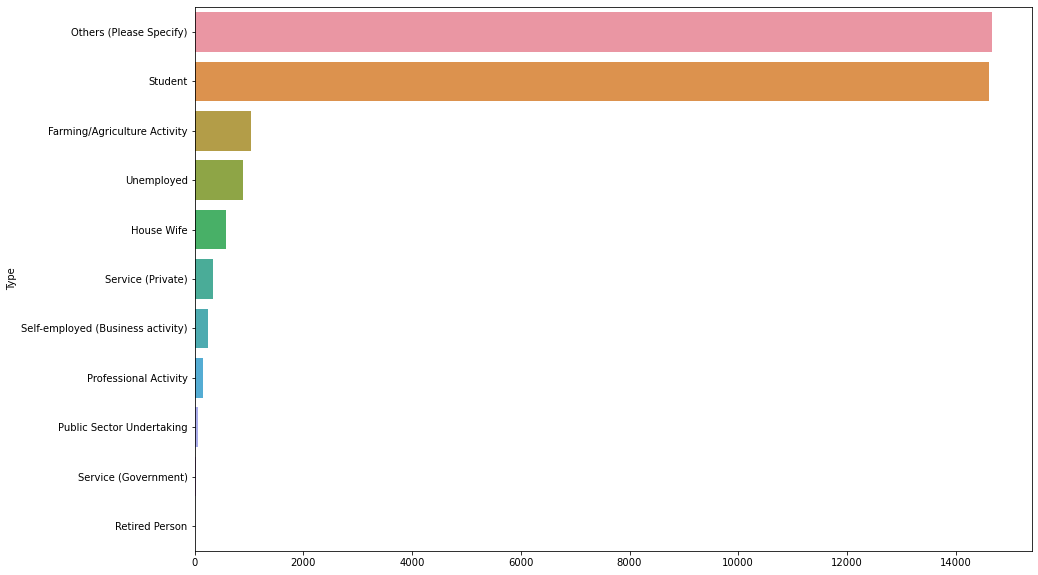

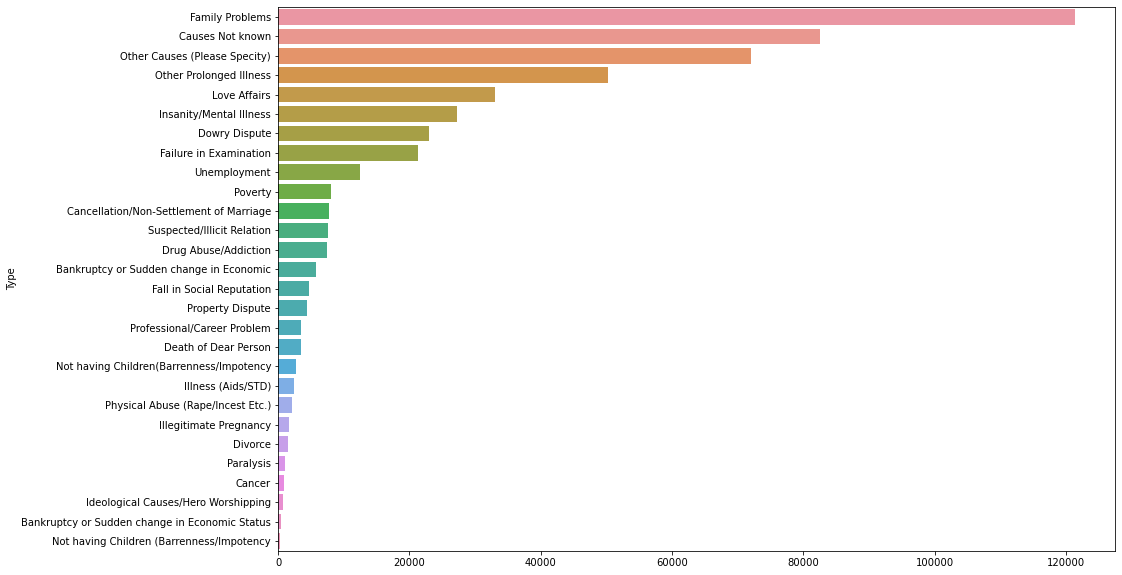

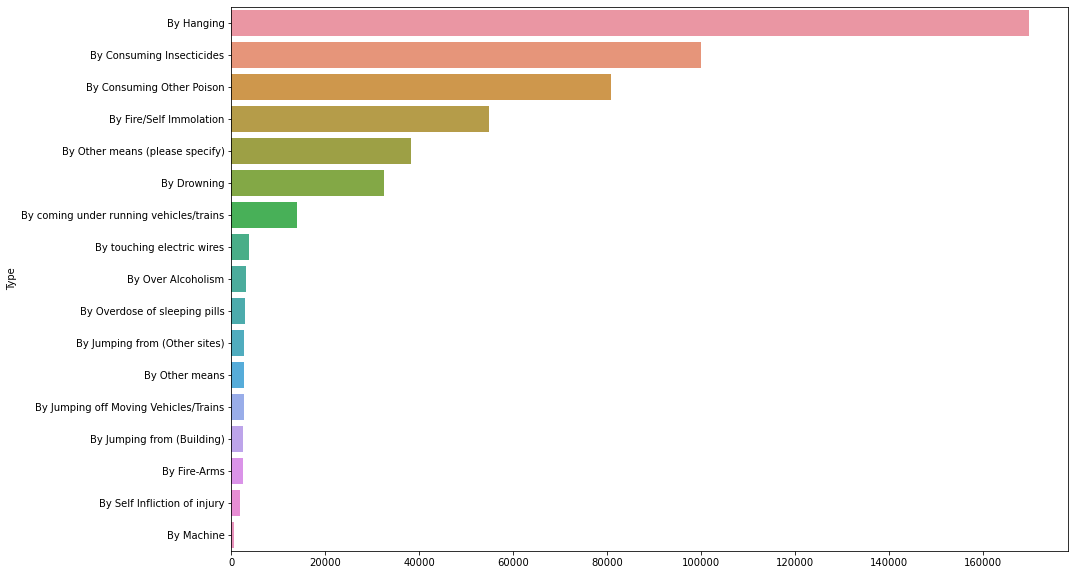

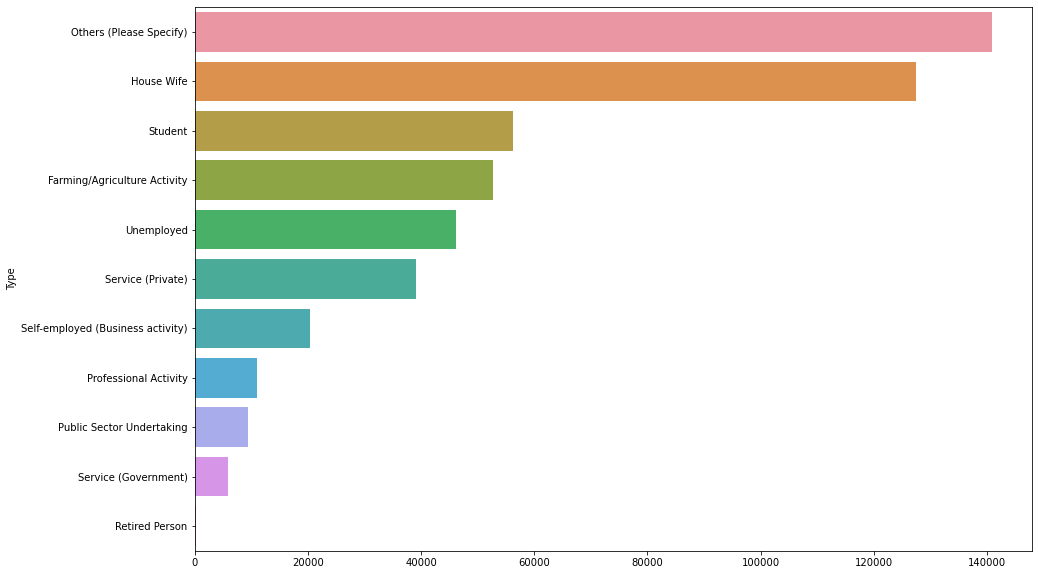

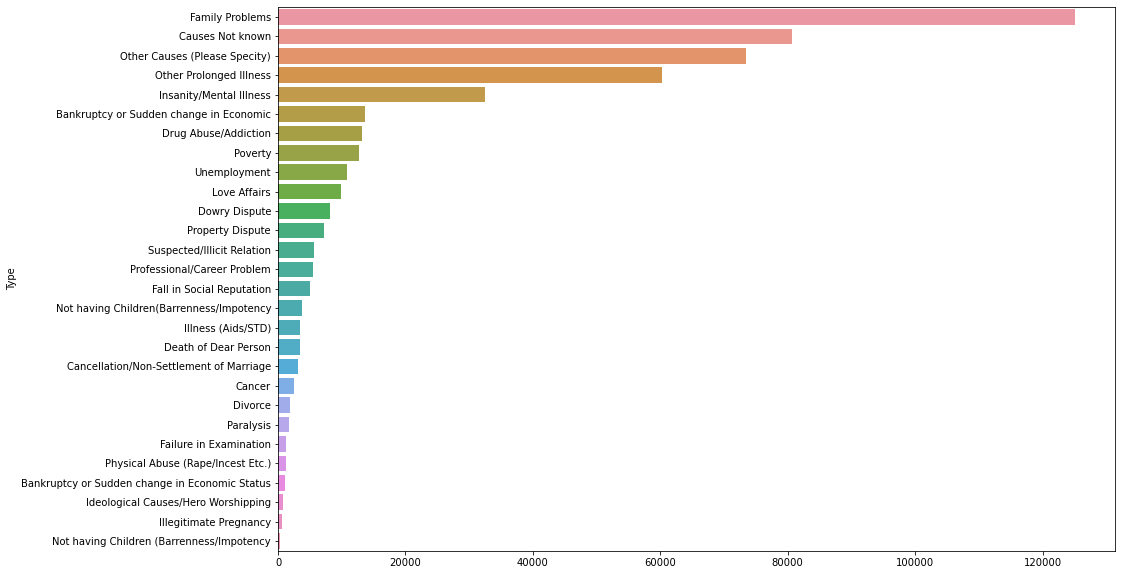

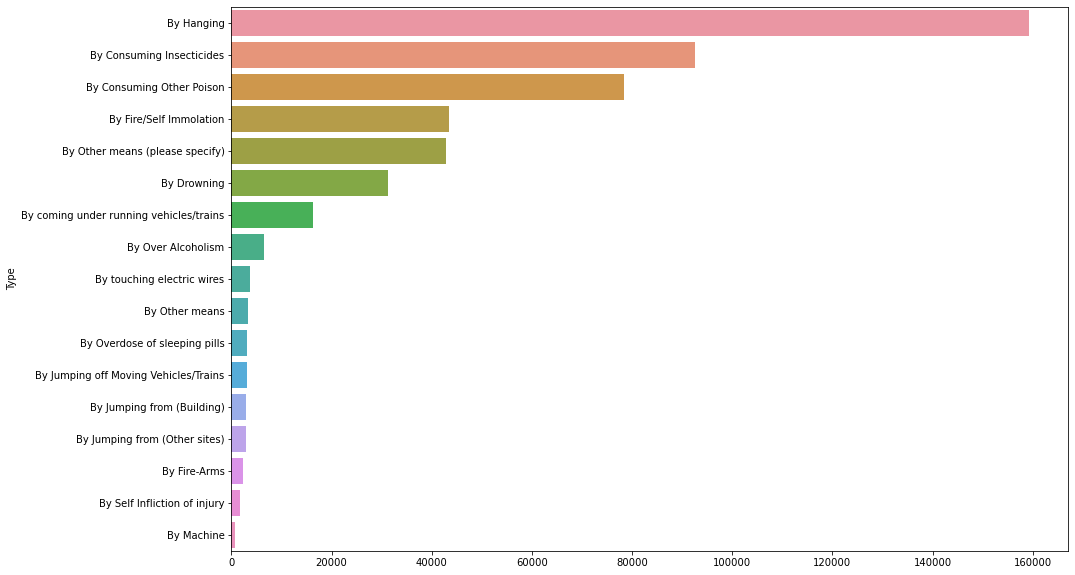

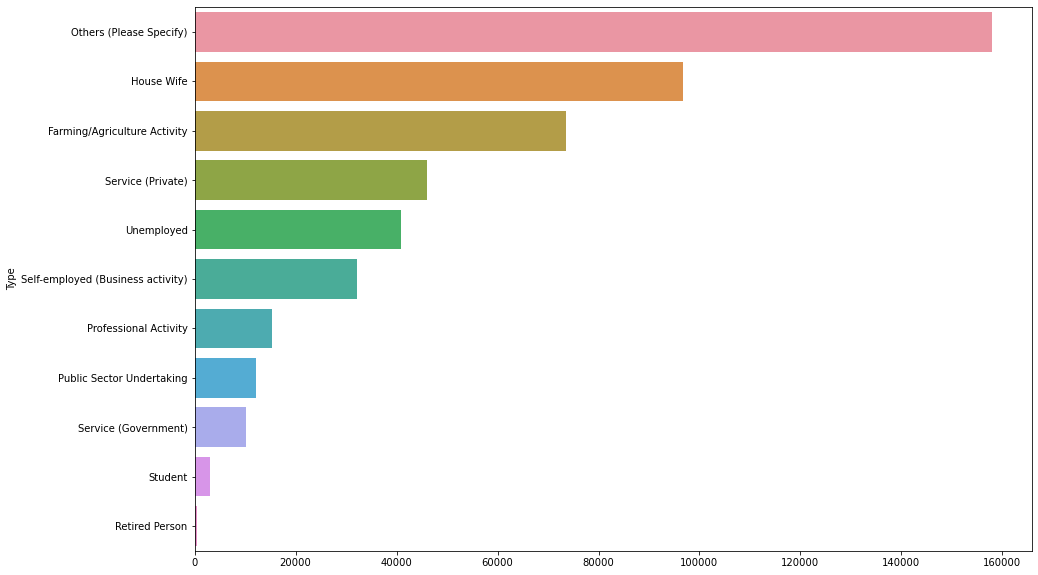

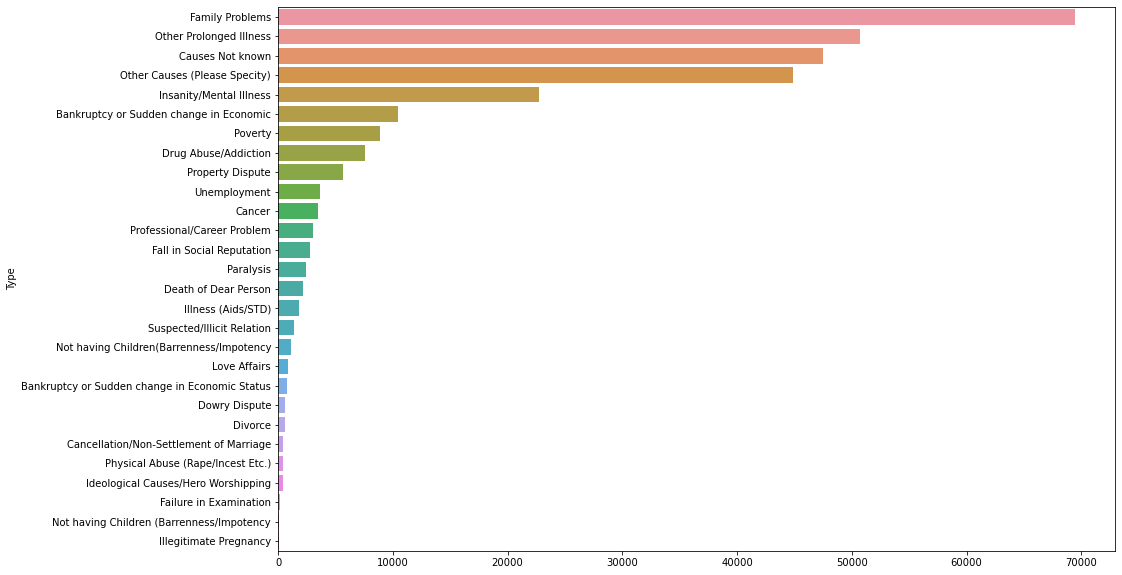

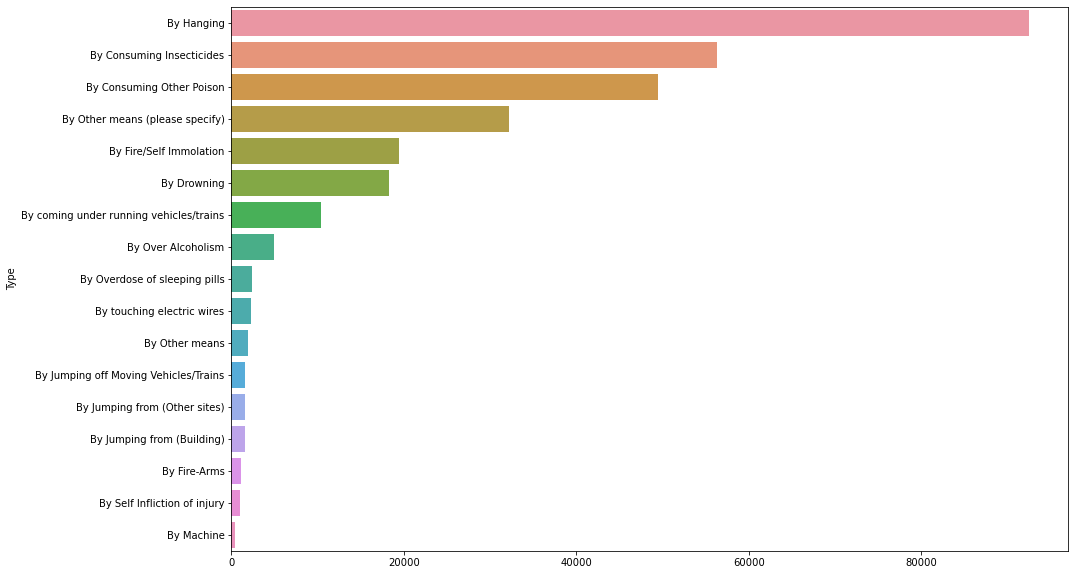

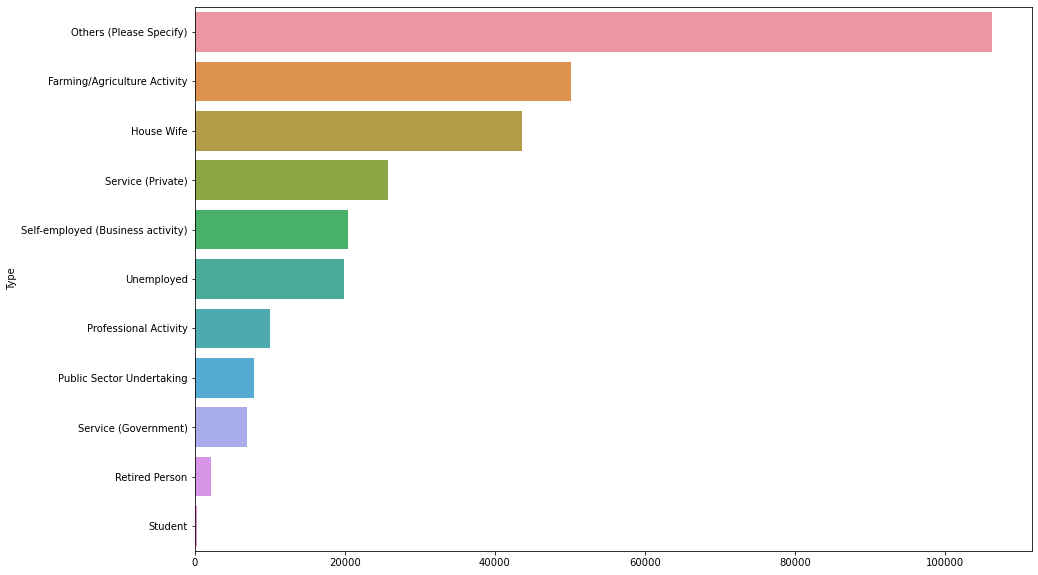

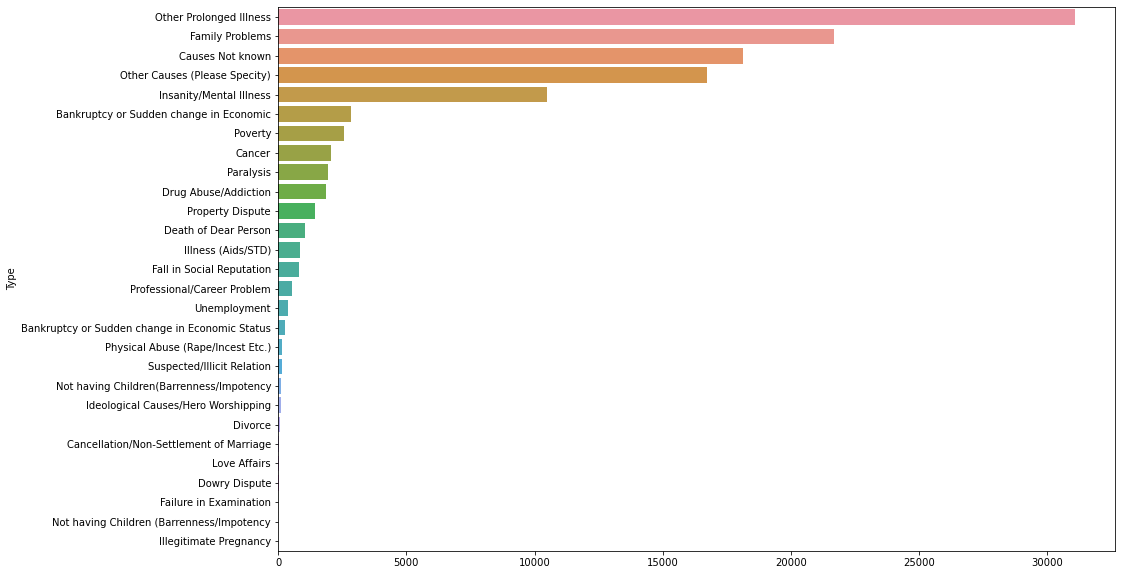

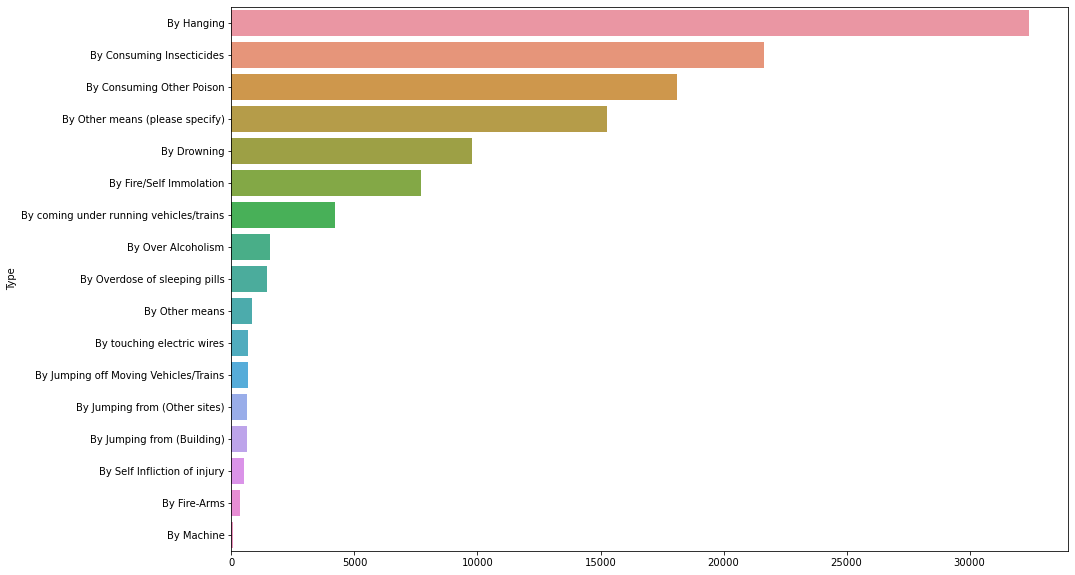

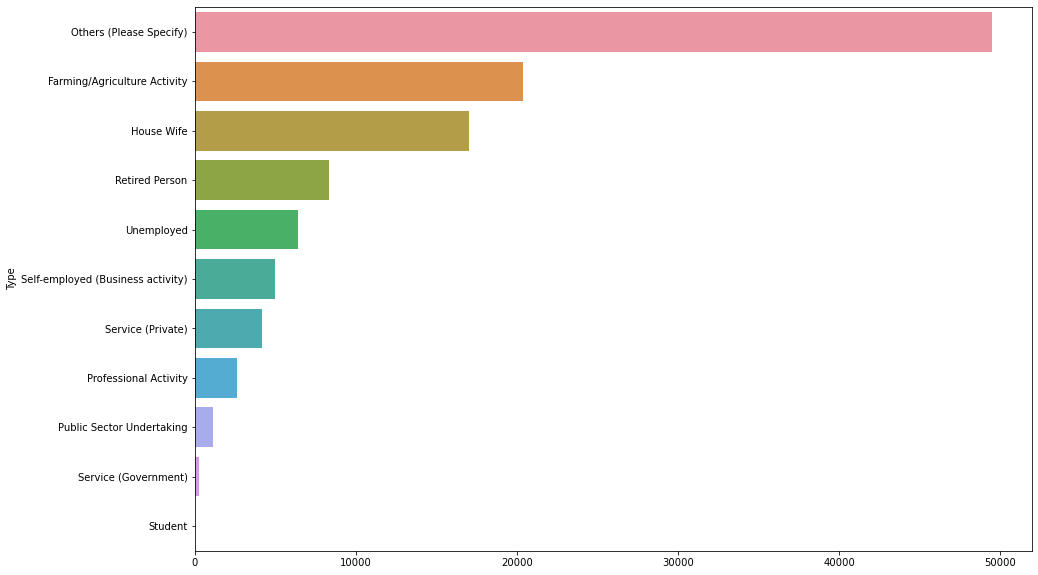

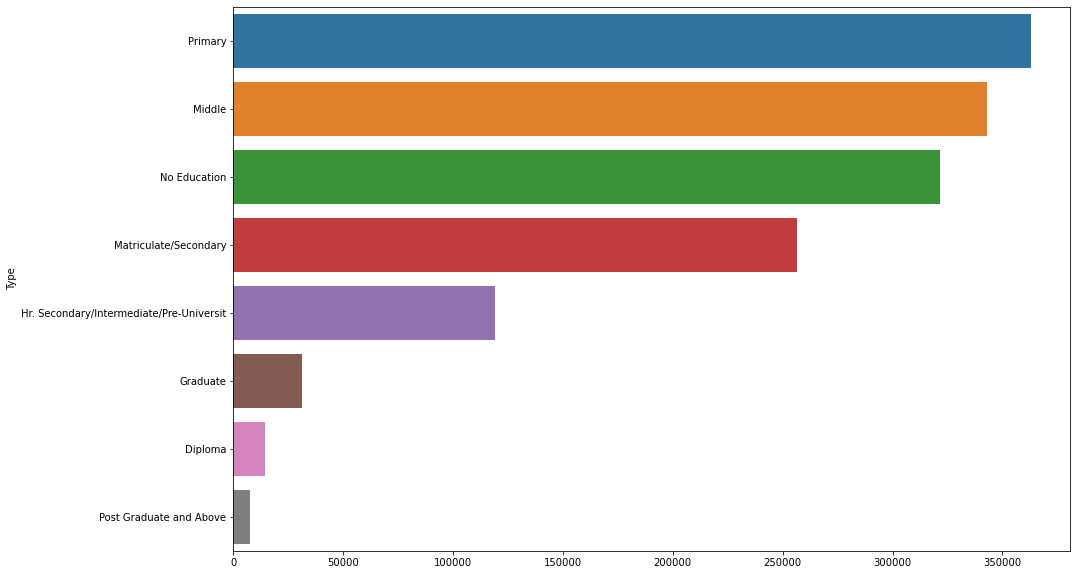

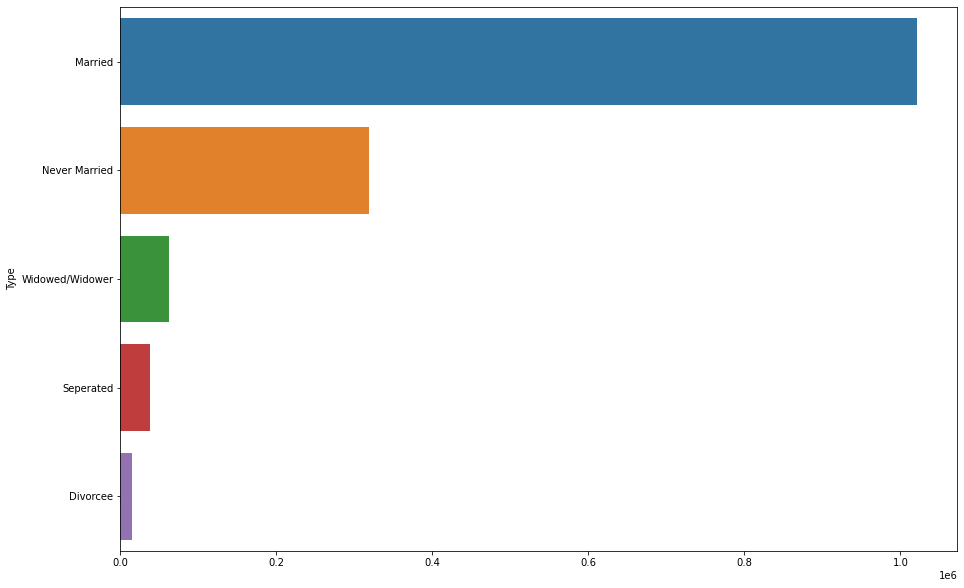

In [404]:
for i in range(len(ageres)): 
    sucide_age_wise_plot(ageres[i],f"Suicide by {ageres[i]['Type_code'].values[i]} of {ageres[i]['Age_group'].values[i]} Age")